# Ejercicio 3

Plot the monthly number of searches for flights arriving at Málaga, Madrid or Barcelona

For the arriving airport, you can use the Destination column in the searches file. 
Plot a curve for Málaga, another one for Madrid, and another one for Barcelona, in the same figure.

Bonus point: Solving this problem using pandas (instead of any other approach)


In [110]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 70
pd.options.display.max_columns = 60

In [111]:
#Investigamos el archivo desde termina:
# 20 millones de columnas
! cat searches.csv | head -10000 > searches.muestra.csv

cat: stdout: Broken pipe


In [112]:
dfs_muestra = pd.read_csv("searches.muestra.csv", sep='^')

In [113]:
dfs_muestra.shape

(9999, 45)

In [116]:
dfs_muestra.sample(3)

,Date,Time,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
18,2013-01-01,10:47:24,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,TBS,IKT,0,1,TBS,IKT,2013-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
5459,2013-01-06,22:08:34,MPT,d8cfdeaa1e5442b0fb728a71485f426c,ES,MAD,ROM,1,2,MAD,ROM,2013-04-01,DF,NaN,ROM,MAD,2013-04-08,DF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,MAD
361,2013-01-01,22:31:21,MPT,43e7668e3e4f11dfe8a0867d4ad95d46,DE,DOK,HRK,1,2,DOK,HRK,2013-01-04,NaN,NaN,HRK,DOK,2013-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FMO


In [67]:
#Vamos a Hacer el Date Time Column
from datetime import datetime
from datetime import timedelta

#Juntar columnas lo primero
dfs_muestra.index = (dfs_muestra.Date +" "+ dfs_muestra.Time)
#Convertirlo en formato date
dfs_muestra.index = pd.to_datetime(dfs_muestra.index, format="%Y-%d-%m %H:%M:%S")
#eliminar las columnas que ya no me sirven
dfs_muestra.drop(columns=['Date', 'Time'], inplace=True)

In [68]:
dfs_muestra.head(3)

,TxnCode,OfficeID,Country,Origin,Destination,RoundTrip,NbSegments,Seg1Departure,Seg1Arrival,Seg1Date,Seg1Carrier,Seg1BookingCode,Seg2Departure,Seg2Arrival,Seg2Date,Seg2Carrier,Seg2BookingCode,Seg3Departure,Seg3Arrival,Seg3Date,Seg3Carrier,Seg3BookingCode,Seg4Departure,Seg4Arrival,Seg4Date,Seg4Carrier,Seg4BookingCode,Seg5Departure,Seg5Arrival,Seg5Date,Seg5Carrier,Seg5BookingCode,Seg6Departure,Seg6Arrival,Seg6Date,Seg6Carrier,Seg6BookingCode,From,IsPublishedForNeg,IsFromInternet,IsFromVista,TerminalID,InternetOffice
2013-01-01 20:25:57,MPT,624d8c3ac0b3a7ca03e3c167e0f48327,DE,TXL,AUH,1,2,TXL,AUH,2013-01-26,D2,NaN,AUH,TXL,2013-02-02,D2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,FRA
2013-01-01 10:15:33,MPT,b0af35b31588dc4ab06d5cf2986e8e02,MD,ATH,MIL,0,1,ATH,MIL,2013-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,KIV
2013-01-01 18:04:49,MPT,3561a60621de06ab1badc8ca55699ef3,US,ICT,SFO,1,2,ICT,SFO,2013-08-02,NaN,NaN,SFO,ICT,2013-08-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1ASIWS,0,0,0,d41d8cd98f00b204e9800998ecf8427e,NYC


In [78]:
#Para meter los nombres reales en otra columna
import neobase as nb
from neobase import NeoBase
geoDict=NeoBase()

#Probamos
geoDict.get('AGP')['name']

'Málaga Airport'

In [74]:
#Lo pasamos, pero antes elimino el que me da error
df_muestra_des = dfs_muestra[dfs_muestra['Destination']!='CPQ']
df_muestra_des['nombre_destino'] = df_muestra_des['Destination'].map(lambda x:geoDict.get(x)['name'])
print(df_muestra_des.head())
print(df_muestra_des.shape)

                    TxnCode                          OfficeID Country Origin  \
2013-01-01 20:25:57     MPT  624d8c3ac0b3a7ca03e3c167e0f48327      DE    TXL   
2013-01-01 10:15:33     MPT  b0af35b31588dc4ab06d5cf2986e8e02      MD    ATH   
2013-01-01 18:04:49     MPT  3561a60621de06ab1badc8ca55699ef3      US    ICT   
2013-01-01 17:42:40     FXP  1864e5e8013d9414150e91d26b6a558b      SE    RNB   
2013-01-01 17:48:29     MPT  1ec336348f44207d2e0027dc3a68c118      NO    OSL   

                    Destination  RoundTrip  NbSegments Seg1Departure  \
2013-01-01 20:25:57         AUH          1           2           TXL   
2013-01-01 10:15:33         MIL          0           1           ATH   
2013-01-01 18:04:49         SFO          1           2           ICT   
2013-01-01 17:42:40         ARN          0           1           RNB   
2013-01-01 17:48:29         MAD          1           2           OSL   

                    Seg1Arrival    Seg1Date Seg1Carrier Seg1BookingCode  \
2013-01-01 

/Users/victormac/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
#Cuantos destinos son a Málaga, Madrid y Barcelona
number_mal = df_muestra_des[df_muestra_des['Destination'] == 'AGP']['Origin'].count()
number_mad = df_muestra_des[df_muestra_des['Destination'] == 'MAD']['Origin'].count()
number_bar = df_muestra_des[df_muestra_des['Destination'] == 'BCN']['Origin'].count()
print(number_mad)

125


In [86]:
#Cuantos hay NaN
plot.df_muestra_des.isnull().sum()

NameError: name 'plot' is not defined

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

<BarContainer object of 3 artists>

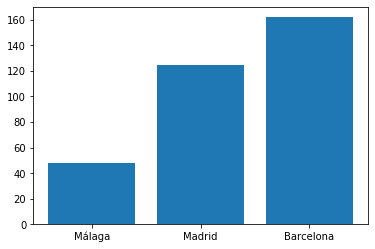

In [108]:
#Vuelos en total que terminan en estas ciudades
x = 'Málaga', 'Madrid', 'Barcelona', 
y = number_mal, number_mad, number_bar
plt.bar(x, y)

In [117]:
# Probando en la shell con la muestra
! cut -d^ -f7 searches.muestra.csv | grep MAD | wc -l

     125


In [118]:
# Probando en la shell con el total
! cut -d^ -f7 searches.csv | grep MAD | wc -l

  269143
